In [45]:
import numpy as np
import scipy.sparse as sprs
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

import debugger_module as dbg
from ising_module_sparse import hamiltonian_ising, magnetization_z, magnetization_x, von_neuman_entropy

# Setting the display options for pandas
pd.set_option('display.max_rows', 200)
plt.rcParams.update({'font.size': 15}) #setting font size for the plots
color_cycle = plt.cm.Set1.colors  # Setting a predefined colormap for the plots


In [83]:
# Read files in the "data" subfolder that start with "magnetization" and load them into a dataframe
data_folder = './data'
file_prefix = 'magnetization'
data_files = [f for f in os.listdir(data_folder) if f.startswith(file_prefix)]

# Read the data files into a dictionary of dataframes
column_names = ['lambda', 'M_z', 'M_x', 'Entanglement']   # Column names for the dataframes
dataframes_dict = {}
for file in data_files:
    # Read the data file into a dataframe
    df = pd.read_csv(os.path.join(data_folder, file), names=column_names)
    
    # Extract the value of N from the filename and use it as the key in the dictionary
    N=re.search(r'N(.*?)\.', file).group(1)
    N=int(N)

    # Store the dataframe in the dictionary
    dataframes_dict[N] = df

# Sort the dataframes by the value of N
N_values = sorted(dataframes_dict.keys())


<class 'list'>


[CHECKPOINT] N = 6
[CHECKPOINT] N = 8
[CHECKPOINT] N = 10
[CHECKPOINT] N = 12
[CHECKPOINT] N = 14
[CHECKPOINT] N = 16
[CHECKPOINT] N = 18


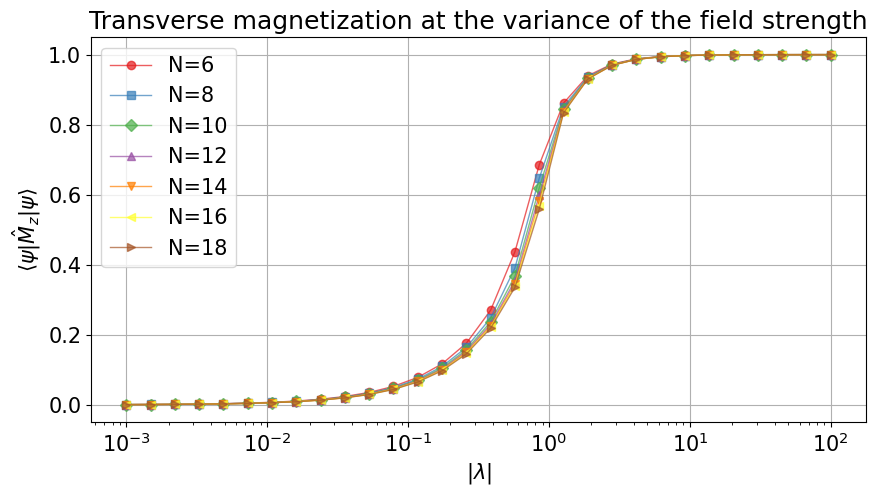

In [85]:
#Z COMPONENT OF THE MAGNETIZATION

plt.figure(figsize=(10, 5))
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'd', '|', '_']

ii=0 #index for the color cycle
for NN in N_values: #loop over the different N values

    dbg.checkpoint('N = {}'.format(NN))
    
    #filtering data related to specific N 
    magnetization_df = dataframes_dict[NN]
    
    # Extract the values of lambda and magnetization from the dataframe
    lambda_values = magnetization_df['lambda'].unique()
    mz_values = magnetization_df['M_z'].values

    # Plot the magnetization as a function of lambda
    plt.plot(np.abs(lambda_values), mz_values, color = color_cycle[ii], label=f'N={NN}', alpha=0.7, linewidth=1, marker = markers[ii])

    ii+=1


plt.xlabel('$|\lambda|$')
plt.xscale('log')
plt.ylabel(r'$\langle \psi | \hat{M}_z | \psi \rangle$')
plt.title('Transverse magnetization at the variance of the field strength')
plt.grid()
plt.legend()
plt.savefig(f'/home/albertos/quantumInfo/ex7/plots/magnetization_z.svg', format='svg', bbox_inches='tight')
plt.show()


[CHECKPOINT] N = 6
[CHECKPOINT] N = 8
[CHECKPOINT] N = 10
[CHECKPOINT] N = 12
[CHECKPOINT] N = 14
[CHECKPOINT] N = 16
[CHECKPOINT] N = 18


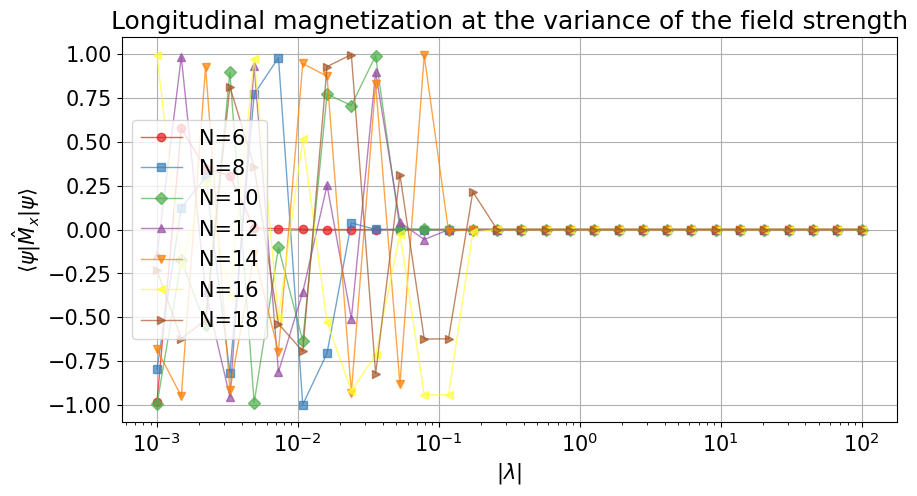

In [84]:
#X COMPONENT OF THE MAGNETIZATION

plt.figure(figsize=(10, 5))
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'd', '|', '_']

ii=0  #index for the color cycle
for NN in N_values: #loop over the different N values

    dbg.checkpoint('N = {}'.format(NN))
    
    #filtering data related to specific N 
    magnetization_df = dataframes_dict[NN]

    # Extract the values of lambda and magnetization from the dataframe
    lambda_values = magnetization_df['lambda'].unique()
    mx_values = magnetization_df['M_x'].values

    # Plot the magnetization as a function of lambda
    plt.plot(np.abs(lambda_values), mx_values, color = color_cycle[ii], label=f'N={NN}', alpha=0.7, linewidth=1, marker = markers[ii])

    ii+=1
plt.xlabel('$|\lambda|$')
plt.xscale('log')
plt.ylabel(r'$\langle \psi | \hat{M}_x | \psi \rangle$')
plt.title('Longitudinal magnetization at the variance of the field strength')
plt.grid()
plt.legend()
plt.show()